# Import Python Modules
First import the modules that are used at this project:

In [1]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Data

To analyze the data of OkCupid app we import the data of `profiles.csv` and create the `profiles` DataFrame. It will be usefull to explore the first 5 rows to see what kind of information does the DataFrame contains.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


By using the **info()** command we can find several important data, first according to the type of variable we have 3 numerical characteristics and 28 categorical characteristics, we can also observe that there are characteristics in which we have null values. And also, the data set takes up 14.2 MB of space.

In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

Most of the variables are pretty intituive except fot the **easy** columns and the **last_online**. When printing them it is possible to understand that last online corresponds to a **date** variable and that the **essay** columns are divided into:

1. **essay0**: Summary of who are you
1. **essay1**: What are you doing with your life
1. **essay2**: What are you good at
1. **essay3**: First thing people notice about you
1. **essay4**: Favorite books, movies, show, music, food
1. **essay5**: The six things you could never do without
1. **essay6**: You spend a lot of time thinking about
1. **essay7**: On a typical Friday night you are
1. **essay8**: The most private thing you are willing to admit
1. **essay9**: You should message me if...

In [4]:
profiles.iloc[[1,2,3],[6,7,8,9,10,11,12,13,14,15]]

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.


In [5]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

# Explore and Visualize the Data

Lets explore the data, function `describe` doesn't show us a lot of information. Just information for **age**, **height** and **income**.

In [6]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Some `value_counts()` were made to check the number of variants found in certain features. Features like **drugs** has few variations but there are some type of feautes as **location** that that has a lot of them.

In [7]:
profiles['drugs'].value_counts()

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64

In [8]:
profiles['diet'].value_counts()

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

In [9]:
profiles['location'].value_counts()

location
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: count, Length: 199, dtype: int64

In [10]:
profiles['sex'].value_counts()

sex
m    35829
f    24117
Name: count, dtype: int64

### Continous features
Histograms for the continous features were made, to see their distribution and gain more information.

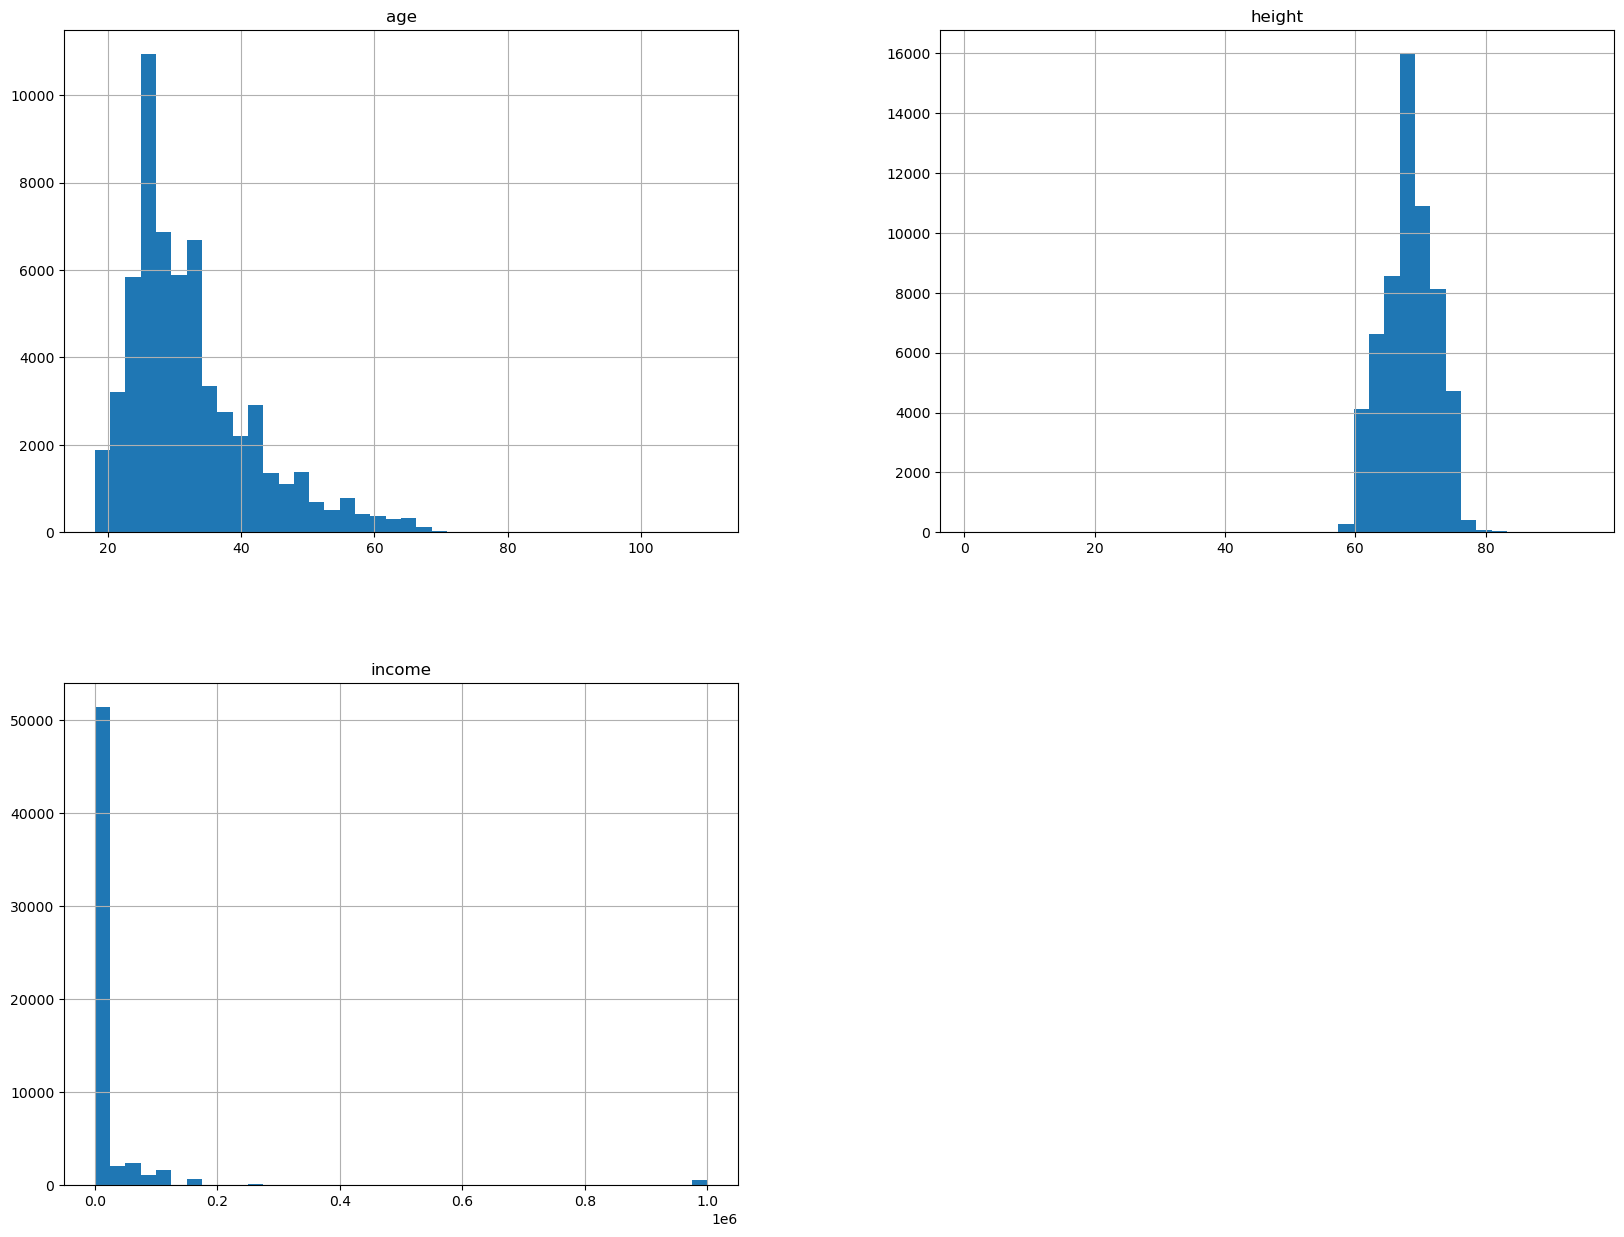

In [11]:
profiles.hist(bins=40, figsize=(20,15))
plt.show()

### Discrete Variables
Let's graph some categorical variables so we can see their distribution.

<Axes: xlabel='count', ylabel='orientation'>

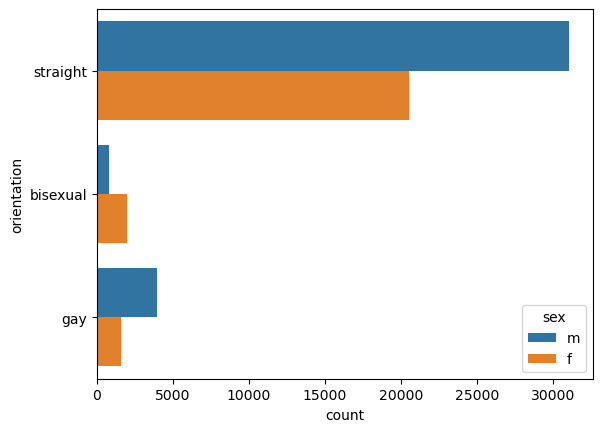

In [12]:
sns.countplot(data=profiles, y='orientation', hue='sex')

<Axes: xlabel='count', ylabel='sign'>

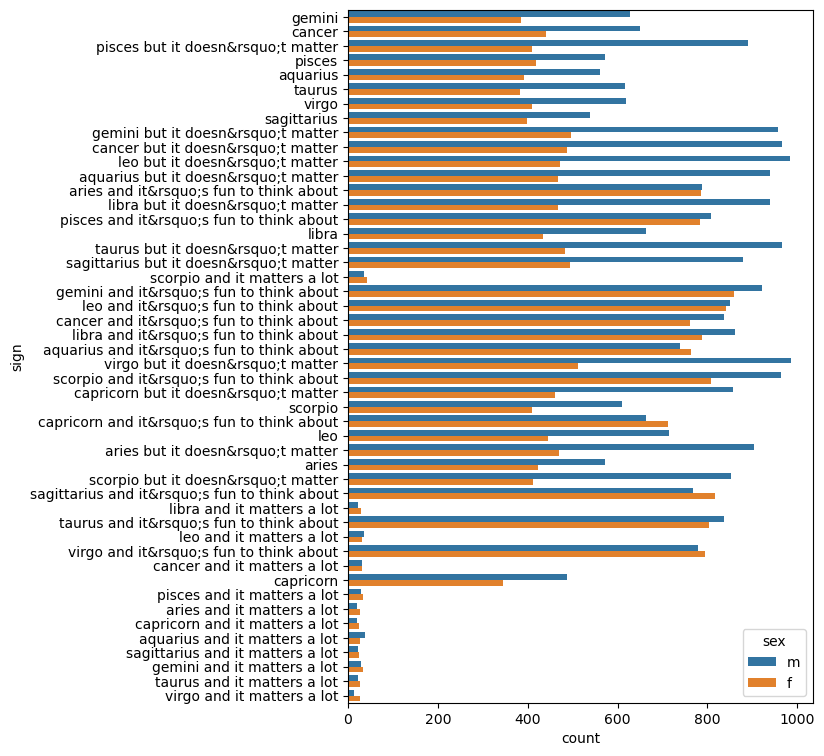

In [13]:
plt.figure(figsize=(6,9))
sns.countplot(data=profiles, y='sign', hue='sex')

We proceed to clean the column of signs to be able to observe the true distribution between signs.

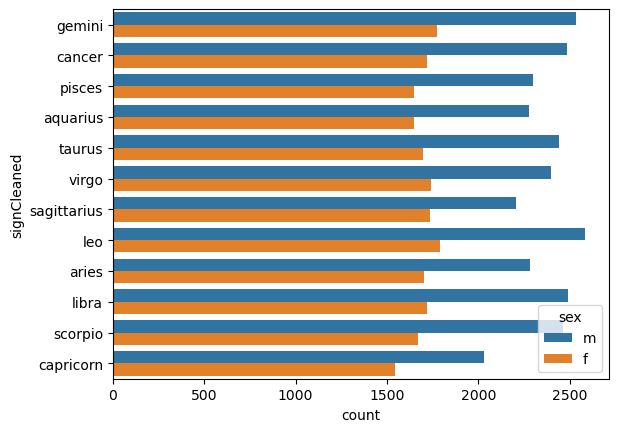

In [14]:
profiles['signCleaned'] = profiles.sign.str.split().str.get(0)
sns.countplot(data=profiles, y="signCleaned", hue='sex');

We review how important the other person's sign is for users, we notice that for the minority it is a really important issue because we do not take it as an important characteristic for our app. The bar that has no description corresponds to people who did not specify if they cared about the sign, so it is assumed that they are people who really do not give importance to the sign of the other.

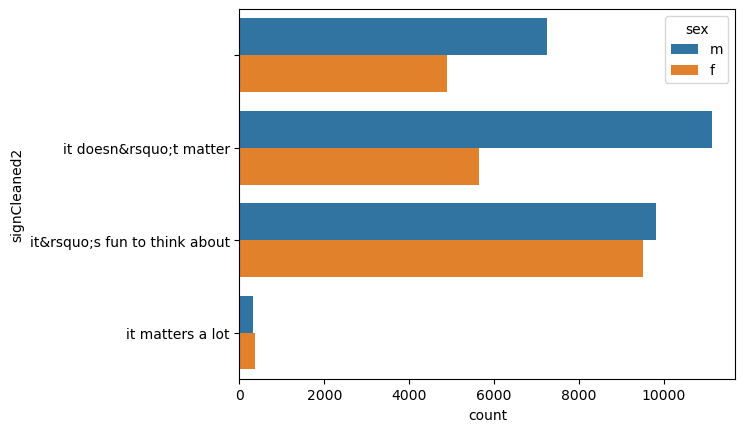

In [15]:
profiles['signCleaned2'] =  profiles['sign'].apply(lambda x: ' '.join(str(x).split(' ')[2:]) if isinstance(x, str) else x)
sns.countplot(data=profiles, y="signCleaned2", hue='sex');

For religion we have the same issue than for sign, let's review the actual distribution and if people really care about it.

<Axes: xlabel='count', ylabel='religion'>

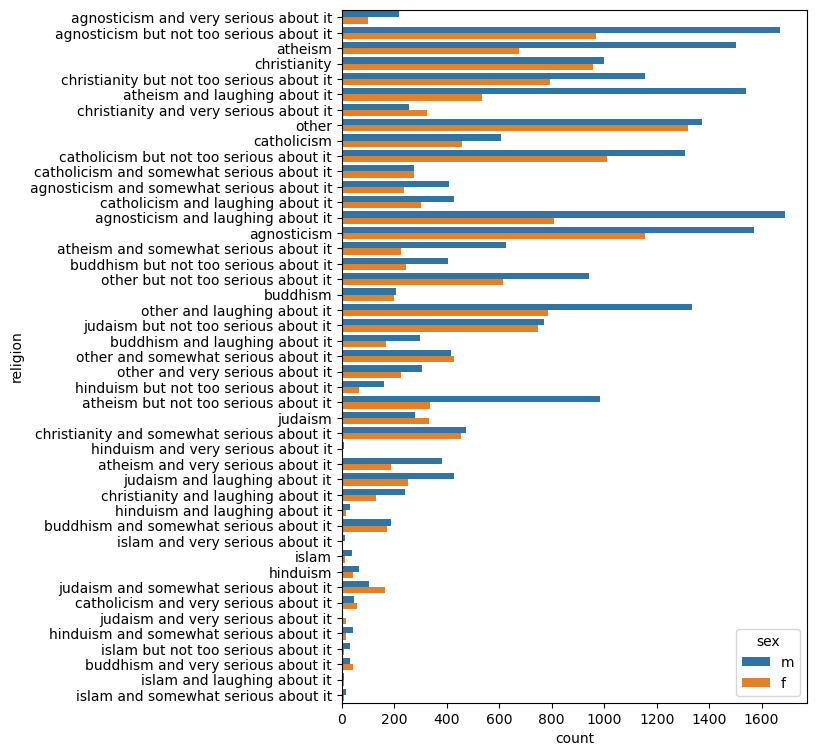

In [16]:
plt.figure(figsize=(6,9))
sns.countplot(data=profiles, y='religion', hue='sex')

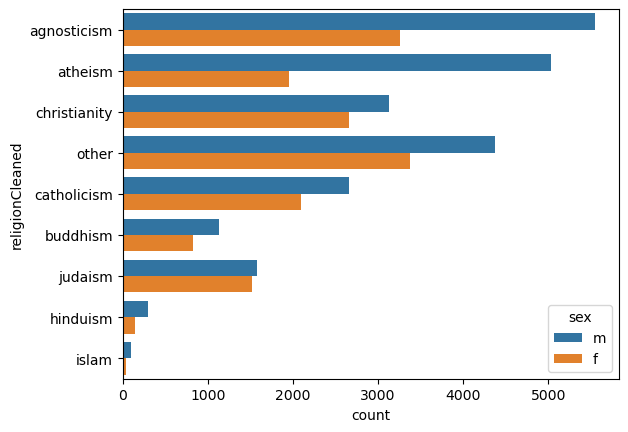

In [17]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned", hue='sex');

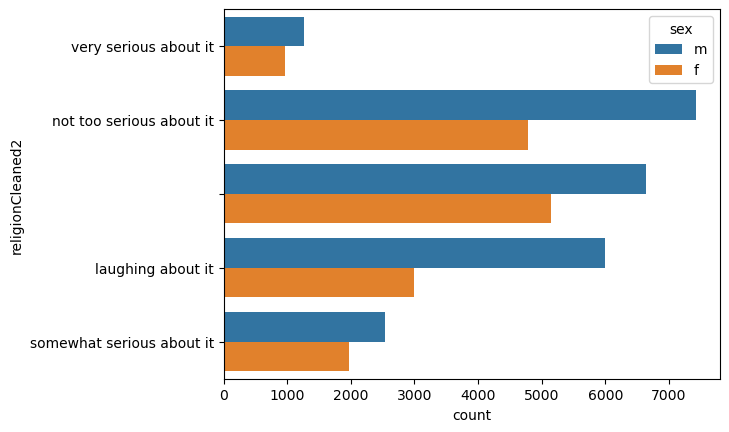

In [18]:
profiles['religionCleaned2'] =  profiles['religion'].apply(lambda x: ' '.join(str(x).split(' ')[2:]) if isinstance(x, str) else x)
sns.countplot(data=profiles, y="religionCleaned2", hue='sex');

<Axes: xlabel='count', ylabel='education'>

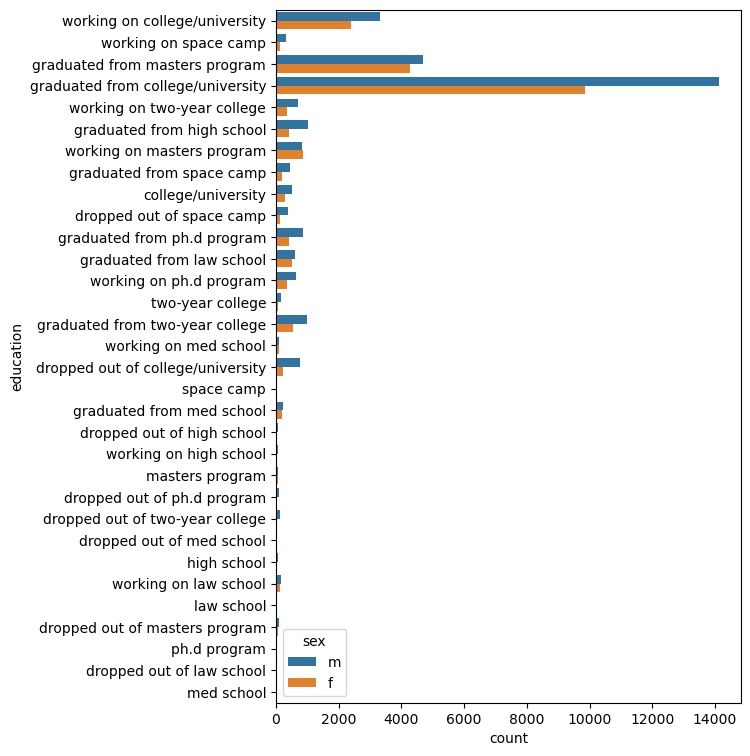

In [19]:
plt.figure(figsize=(6,9))
sns.countplot(data=profiles, y='education', hue='sex')

<Axes: xlabel='count', ylabel='diet'>

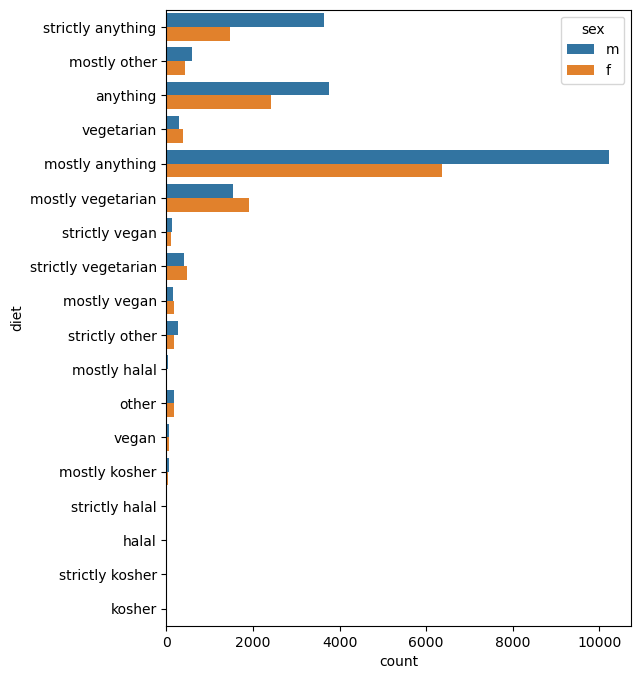

In [20]:
plt.figure(figsize=(6,8))
sns.countplot(data=profiles, y='diet', hue='sex')

<Axes: xlabel='count', ylabel='location'>

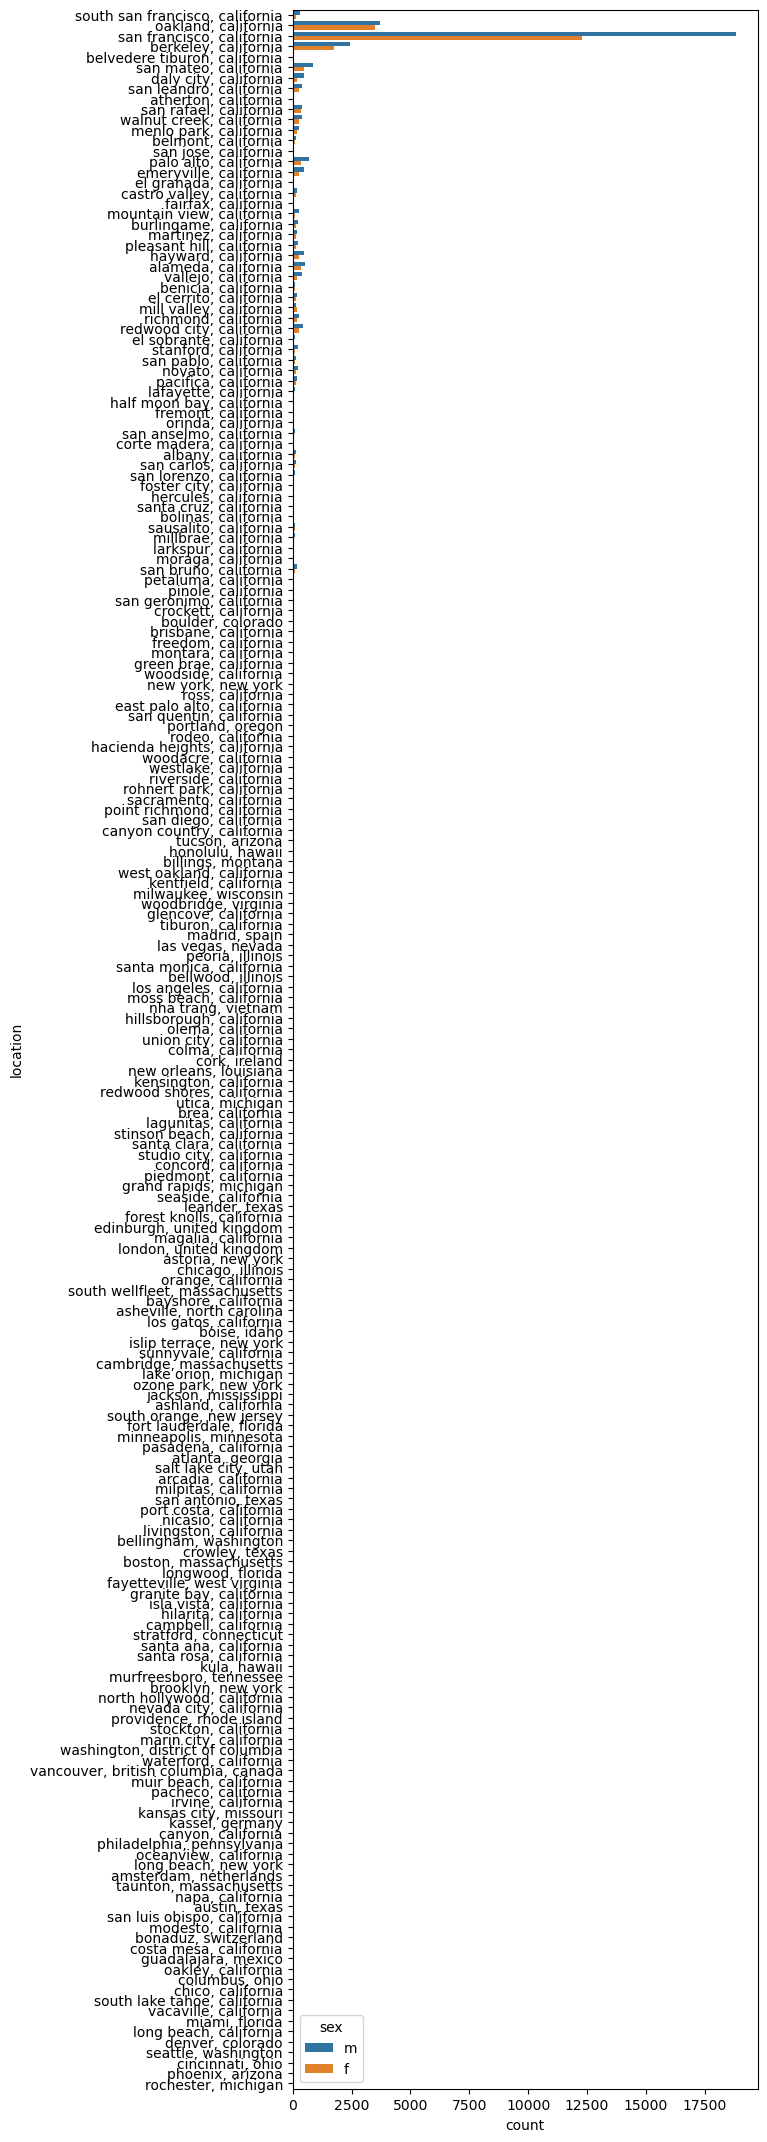

In [21]:
plt.figure(figsize=(6,27))
sns.countplot(data=profiles, y='location', hue='sex')

<Axes: xlabel='count', ylabel='status'>

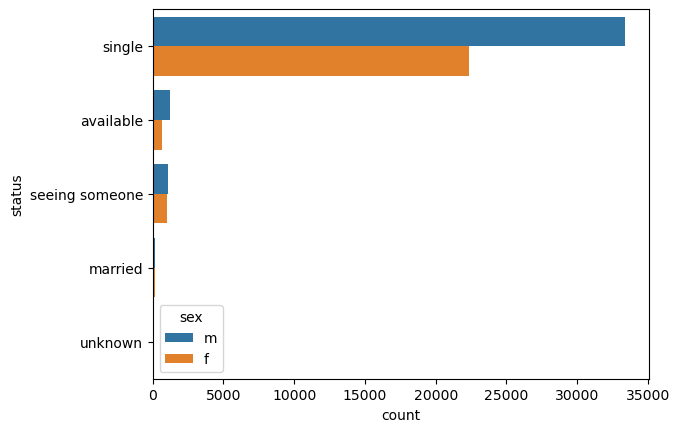

In [22]:
sns.countplot(data=profiles, y='status', hue='sex')

<Axes: xlabel='count', ylabel='job'>

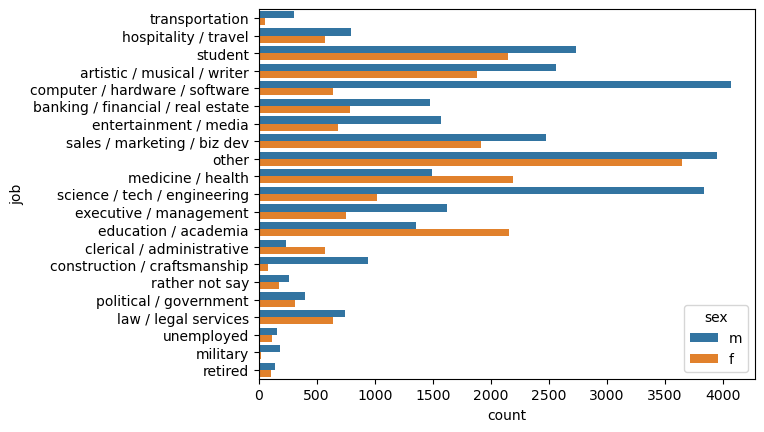

In [23]:
sns.countplot(data=profiles, y='job', hue='sex')

<Axes: xlabel='count', ylabel='pets'>

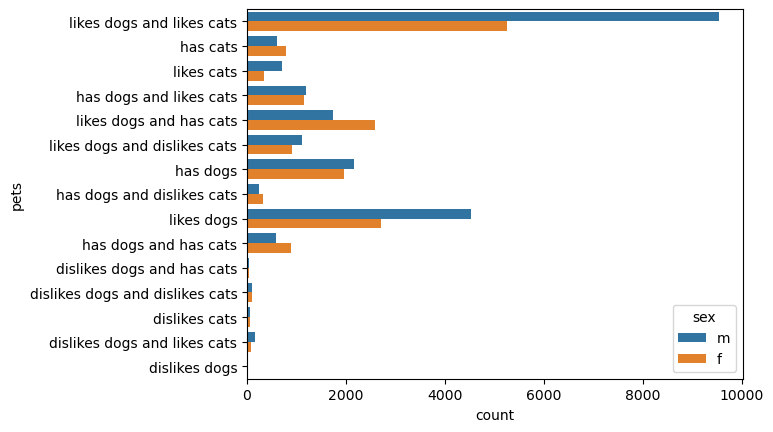

In [24]:
sns.countplot(data=profiles, y='pets', hue='sex')

<Axes: xlabel='count', ylabel='body_type'>

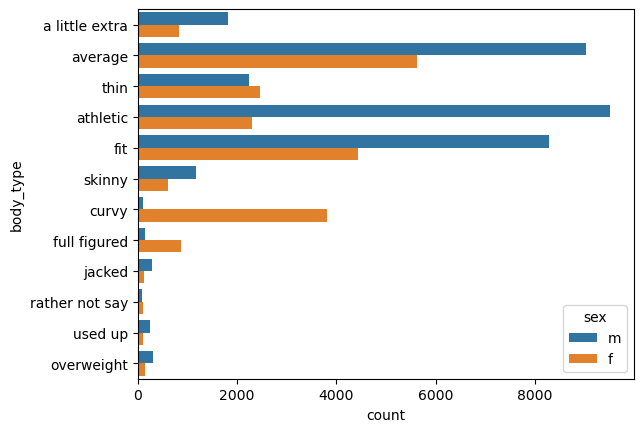

In [25]:
sns.countplot(data=profiles, y='body_type', hue='sex')

Now that we have observed most of the data present in each variable, we notice that there is a great distribution in the data in each of them.

## Data Preparation


### Missing Data
Lets check the number of data missing that we have on check of our variables.

In [26]:
profiles.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
signCleaned         11056
signCleaned2        11056
religionCleaned     20226
religionCleaned2    20226
dtype: int64

Filtering the data for the modeling is important. Lets select the columns that may be good indicator to predict the `body_type` of a person

In [27]:
cols = ['age','body_type', 'drinks', 'drugs', 'education', 'height', 'income',
       'sex', 'job', 'smokes']
df = profiles[cols].dropna()
df.shape

(33336, 10)

The next step is to normalize the numerical data, for which we can use a `StandardScaler`.

In [28]:
from sklearn.preprocessing import StandardScaler
cols_num = ['age', 'height', 'income']
features = df[cols_num]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[cols_num] = features
df.describe()

,age,height,income
count,3.333600e+04,3.333600e+04,3.333600e+04
mean,3.111928e-16,-1.528681e-15,3.154557e-17
std,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.491643e+00,-1.660030e+01,-2.355185e-01
25%,-6.914353e-01,-5.810480e-01,-2.355185e-01
50%,-2.913314e-01,-7.250037e-02,-2.355185e-01
75%,5.088765e-01,6.903210e-01,-2.355185e-01
max,3.609682e+00,6.792892e+00,9.473828e+00


We proceed to perform a get dummies to be able to use the categorical variables in the analysis.

In [29]:
cols_cat = ['body_type','drinks', 'drugs', 'education','sex', 'job', 'smokes']
for col in cols_cat[1:]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head()

,age,body_type,height,income,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,...,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,-1.091539,a little extra,1.707416,-0.235518,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,0.208799,average,0.436047,0.541238,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.391357,athletic,-0.581048,-0.235518,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
7,-0.191305,average,-0.835322,-0.235518,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,0.408851,athletic,-0.835322,-0.235518,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [30]:
df.body_type.value_counts()

body_type
average           9101
fit               7502
athletic          7160
thin              2803
curvy             2421
a little extra    1771
skinny            1042
full figured       690
overweight         305
jacked             222
used up            197
rather not say     122
Name: count, dtype: int64

In [31]:
df.head()

,age,body_type,height,income,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,...,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,-1.091539,a little extra,1.707416,-0.235518,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,0.208799,average,0.436047,0.541238,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.391357,athletic,-0.581048,-0.235518,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
7,-0.191305,average,-0.835322,-0.235518,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,0.408851,athletic,-0.835322,-0.235518,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


Lets split the data into train and test sets. 25% for test and 75% of the data is remain for training.

In [32]:
X = df.drop(columns = ['body_type'])
y = df['body_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

#turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Prediction

Lets create some modeles, for this project three algorithms will be used. Logistics Regression, KNN and Random Forest.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

First lets try with the Logistic Regression model to see how well the model performed. We first had a convergence problem so we had to adapt the number of iterations.

In [34]:
lr_model = LogisticRegression(multi_class="multinomial", max_iter=1000, class_weight="balanced").fit(X_train, y_train)
lr_predictions = lr_model.predict(X_train)

The final accuracy for this model is 18% which is pretty low so let's try with the other two.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr_predictions))

                precision    recall  f1-score   support

a little extra       0.15      0.14      0.15      1301
      athletic       0.38      0.37      0.37      5419
       average       0.38      0.01      0.02      6804
         curvy       0.18      0.60      0.28      1798
           fit       0.32      0.07      0.11      5674
  full figured       0.08      0.36      0.13       506
        jacked       0.03      0.32      0.06       165
    overweight       0.04      0.34      0.06       232
rather not say       0.02      0.29      0.04        94
        skinny       0.09      0.21      0.12       803
          thin       0.19      0.06      0.09      2066
       used up       0.05      0.46      0.08       140

      accuracy                           0.18     25002
     macro avg       0.16      0.27      0.13     25002
  weighted avg       0.30      0.18      0.16     25002



For the second model that we will try, we get 92% using the Random Forest model. That number seems to be pretty perfect but that also make us think about overfitting.

In [36]:
RandomFor_model = RandomForestClassifier().fit(X_train, y_train)
RandomFor_predictions = RandomFor_model.predict(X_train) 
print(classification_report(y_train, RandomFor_predictions))

                precision    recall  f1-score   support

a little extra       0.97      0.91      0.94      1301
      athletic       0.90      0.93      0.91      5419
       average       0.92      0.93      0.92      6804
         curvy       0.91      0.92      0.92      1798
           fit       0.91      0.91      0.91      5674
  full figured       0.94      0.92      0.93       506
        jacked       0.98      0.91      0.94       165
    overweight       0.97      0.94      0.96       232
rather not say       0.99      0.91      0.95        94
        skinny       0.94      0.87      0.91       803
          thin       0.91      0.89      0.90      2066
       used up       0.96      0.94      0.95       140

      accuracy                           0.92     25002
     macro avg       0.94      0.92      0.93     25002
  weighted avg       0.92      0.92      0.92     25002



A way to notice if our model fell into overfitting is checking if the perfomance of the model is much better in the training set than in the test set, so lets predict both sets. We found out that the training set got a final accuracy of 92% and the test set got a 26%, so that helps us to confirm that the model was overfitting.

In [37]:
RandomFor_train_predictions = RandomFor_model.predict(X_train)

RandomFor_test_predictions = RandomFor_model.predict(X_test)


print("Performance on training set:")
print(classification_report(y_train, RandomFor_train_predictions))

print("Performance on test set:")
print(classification_report(y_test, RandomFor_test_predictions))

Performance on training set:
                precision    recall  f1-score   support

a little extra       0.97      0.91      0.94      1301
      athletic       0.90      0.93      0.91      5419
       average       0.92      0.93      0.92      6804
         curvy       0.91      0.92      0.92      1798
           fit       0.91      0.91      0.91      5674
  full figured       0.94      0.92      0.93       506
        jacked       0.98      0.91      0.94       165
    overweight       0.97      0.94      0.96       232
rather not say       0.99      0.91      0.95        94
        skinny       0.94      0.87      0.91       803
          thin       0.91      0.89      0.90      2066
       used up       0.96      0.94      0.95       140

      accuracy                           0.92     25002
     macro avg       0.94      0.92      0.93     25002
  weighted avg       0.92      0.92      0.92     25002

Performance on test set:
                precision    recall  f1-score  

In [38]:
print(RandomFor_model.max_depth)

None


In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],   # Número de árboles en el bosque
    'max_depth': [10, 15, 20, None],   # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]  # Número de características a considerar en cada división
}

# Definir la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=RandomFor_model, param_distributions=param_grid, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Entrenar el mejor modelo
best_model = random_search.best_estimator_
RandomFor_predictions = best_model.predict(X_train)

# Evaluar el rendimiento
print(classification_report(y_train, RandomFor_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15}


C:\Users\Luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00      1301
      athletic       0.41      0.57      0.48      5419
       average       0.33      0.71      0.46      6804
         curvy       0.58      0.10      0.17      1798
           fit       0.45      0.22      0.29      5674
  full figured       1.00      0.00      0.00       506
        jacked       0.00      0.00      0.00       165
    overweight       0.00      0.00      0.00       232
rather not say       0.00      0.00      0.00        94
        skinny       0.00      0.00      0.00       803
          thin       1.00      0.00      0.00      2066
       used up       0.00      0.00      0.00       140

      accuracy                           0.37     25002
     macro avg       0.31      0.13      0.12     25002
  weighted avg       0.43      0.37      0.31     25002



C:\Users\Luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
RandomFor_model = RandomForestClassifier(n_estimators = 100, max_depth = 15, min_samples_split = 2, 
                                         min_samples_leaf = 4, max_features = 'log2').fit(X_train, y_train)
RandomFor_predictions = RandomFor_model.predict(X_train) 
print(classification_report(y_train, RandomFor_predictions, zero_division = 0))

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00      1301
      athletic       0.41      0.56      0.47      5419
       average       0.33      0.71      0.45      6804
         curvy       0.61      0.11      0.19      1798
           fit       0.44      0.22      0.30      5674
  full figured       0.00      0.00      0.00       506
        jacked       0.00      0.00      0.00       165
    overweight       0.00      0.00      0.00       232
rather not say       0.00      0.00      0.00        94
        skinny       1.00      0.00      0.00       803
          thin       0.75      0.00      0.00      2066
       used up       0.00      0.00      0.00       140

      accuracy                           0.37     25002
     macro avg       0.29      0.13      0.12     25002
  weighted avg       0.42      0.37      0.31     25002



In [49]:
RandomFor_train_predictions = RandomFor_model.predict(X_train)

RandomFor_test_predictions = RandomFor_model.predict(X_test)


print("Performance on training set:")
print(classification_report(y_train, RandomFor_train_predictions, zero_division = 0))

print("Performance on test set:")
print(classification_report(y_test, RandomFor_test_predictions, zero_division = 0))

Performance on training set:
                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00      1301
      athletic       0.41      0.56      0.47      5419
       average       0.33      0.71      0.45      6804
         curvy       0.61      0.11      0.19      1798
           fit       0.44      0.22      0.30      5674
  full figured       0.00      0.00      0.00       506
        jacked       0.00      0.00      0.00       165
    overweight       0.00      0.00      0.00       232
rather not say       0.00      0.00      0.00        94
        skinny       1.00      0.00      0.00       803
          thin       0.75      0.00      0.00      2066
       used up       0.00      0.00      0.00       140

      accuracy                           0.37     25002
     macro avg       0.29      0.13      0.12     25002
  weighted avg       0.42      0.37      0.31     25002

Performance on test set:
                precision    recall  f1-score  

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(RandomFor_model, X_train, y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.31513697 0.31413717 0.3086     0.3194     0.3014    ]
Baseline: 31.17% (0.62%)


Lets try with the KNN model. For this model we get an final accuracy of 45% which is a lot better that the logistic regression model and maybe we are not overfitting.

In [51]:
X_train_a = np.array(X_train)
knn_model = KNeighborsClassifier(n_neighbors = 6).fit(X_train_a, y_train)
knn_predictions = knn_model.predict(X_train_a)
print(classification_report(y_train, knn_predictions))

                precision    recall  f1-score   support

a little extra       0.33      0.23      0.27      1301
      athletic       0.44      0.66      0.53      5419
       average       0.46      0.59      0.52      6804
         curvy       0.44      0.40      0.42      1798
           fit       0.49      0.40      0.44      5674
  full figured       0.42      0.07      0.12       506
        jacked       0.50      0.04      0.08       165
    overweight       0.18      0.01      0.02       232
rather not say       0.00      0.00      0.00        94
        skinny       0.37      0.08      0.13       803
          thin       0.46      0.14      0.22      2066
       used up       0.44      0.03      0.05       140

      accuracy                           0.45     25002
     macro avg       0.38      0.22      0.23     25002
  weighted avg       0.45      0.45      0.43     25002

